In [1]:
%pylab inline
import numpy as np
from scipy import *

Populating the interactive namespace from numpy and matplotlib


<font size="4" style="color:red;"> **IMPORTANT: ** When submitting this notebook as homework, make sure you Only modify cells which have the following comment</font>

```python
# modify this cell
```

<font style="color:red;"> Do not add any new cells when submitting homework. To test out new code, use the coding **scratchpad** by clicking the triangular icon in the bottom right corner of the screen. (**hotkey:** control-B)  </font>



## Review of linear algebra

This notebook is a quick review of the concepts and notation of linear algebra and their implementation in the python library `numpy`.

It is not intended as a course in linear algebra. For an excellent elementary introduction to vectors and linear algebra, see [Gilbert Strang's course on linear algebra](http://web.mit.edu/18.06/www/videos.shtml)

## Vectors
* arrows
* velocity and direction
* location in the plane or in 3D space.
* many many other things.

Vectors spaces are the at the basis of linear algebra. They can be used to describe many things: from points in the plane, to time series to the configuration of electrons in an atom. This notebook is a brief review of some of the main concepts regarding vectors in finite dimensional Euclidean space. 

### A 2D vector

<img style="width:400px" src="images/vector.png">

### A 3D vector

<img style="width:300px" src="images/vectorGeom1.png">

### Vector notation

* We will denote vectors by letters with a little arrow on top: $\vec{a},\vec{b},\vec{v}_1,\vec{v}_2,\ldots$

* Vectors are grouped by **dimension ${\bf d}$**, the set of all $d$ dimensional (euclidean) vectors is denoted $R^d$.

* A 2D vector is an element of $R^2$ and is described by a sequence of **two** real numbers: $\vec{a} = [1,\pi]$ or $\vec{b}=[-1.56,1.2]$

* A 3D vector is an element of $R^3$  
described by a sequence of **three** numbers:  
$\vec{a} = [1,\pi,-\pi]$ or $\vec{b}=[-1.56,1.2,0]$

* A $d$ dimensional vector is an element of $R^d$ and is described by a sequence of $d$ real numbers: $\vec{a} = [a_1,a_2,\ldots,a_d]$

### Lists vs Numpy Arrays

The numpy library (we will reference it by np) is the workhorse library for linear algebra in python.  To creat a vector simply surround a python list ($[1,2,3]$) with the np.array function:

In [2]:
x_vector = np.array([1,2,3])
print x_vector

[1 2 3]


The function `np.array` converts a python list and converts it to an array:

In [3]:
c_list = [1,2]
print "The list:",c_list
print "Has length:", len(c_list)

c_vector = np.array(c_list)
print "The vector:", c_vector
print "Has shape:",c_vector.shape

The list: [1, 2]
Has length: 2
The vector: [1 2]
Has shape: (2,)


In [4]:
z = [5,6]   # a list
print "This is a list, not an array:",z
print type(z)

This is a list, not an array: [5, 6]
<type 'list'>


In [5]:
zarray = np.array(z)
print "This is an array, not a list",zarray
print type(zarray)

This is an array, not a list [5 6]
<type 'numpy.ndarray'>


### Arrays as Vectors
One way to define vectors in numpy is to use a one dimensional array.

In [6]:
v1=np.array([1,2])
v2=np.array([-1,1])
print v1,v2

[1 2] [-1  1]


#### Vector dimension vs. Array dimension

The word **dimension** has two different meanings in this context.

* The array `np.array([1,2,3,4])` **defines a vector** in $R^4$, i.e. a vector of dimension $4$ 

* The array `np.array([1,2,3,4])`  
**is** a 1D array, which is a list of numbers.

* The array `np.array([[1,2],[3,4]])` is a 2D array, which is a rectangle of numbers.

* A 2D array is also called a **Matrix** (more about those later)

In [7]:
np.array([[1,2],[3,4]])

array([[1, 2],
       [3, 4]])

### Visualizing 2D vectors.

The world that we see and experience is three dimensional. Therefor vectors in $R^3$ can be visualized. The screen you are looking at is 2D, which makes it particularly easy to visualize 2D vectors.

Vectors are commonly represented by arrows. The tail of the arrow is at zero, and the $(x,y)$ coordinates of the head of the arrow correspond to the two components of the vector: $\vec{a} = [a_1,a_2]$ 

In [8]:
import matplotlib.pyplot as plt
from numpy.linalg import norm
text_loc=1.1
def plot_arrows(L,scale=4,text_loc=0.2,fontsize=12):
    """ Plot a list of arrows. Each arrow defined by start and end points and a color and optionally text"""
    plt.figure(figsize=[6,6])
    plt.xlim([-scale,scale])
    plt.ylim([-scale,scale])
    ax = plt.axes()
    plt.xlabel('1st coord (x)')
    plt.ylabel('2nd coord (y)')
    #ax.axis('equal')

    for A in L:
        s,e,c=A[:3]
        ax.arrow(s[0], s[1], e[0], e[1], head_width=0.05*scale, head_length=0.1*scale, fc=c, ec=c,length_includes_head=True);
        if len(A)==4:
            t=A[3]
            _loc=1+text_loc/norm(e)
            ax.text(_loc*e[0],_loc*e[1],t,fontsize=fontsize)
    plt.grid()
    return ax
zero=np.array([0,0])

Here are a few examples:

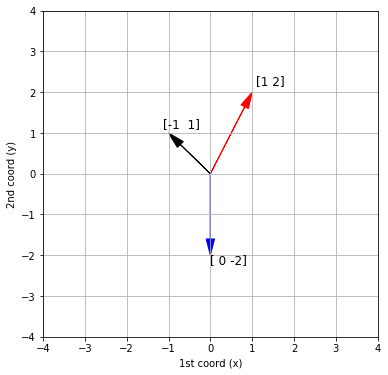

In [9]:
v1=np.array([1,2])
v2=np.array([-1,1])
v3=np.array([0,-2])
plot_arrows([[zero,v1,'r',str(v1)],[zero,v2,'k',str(v2)],[zero,v3,'b',str(v3)]]);

### Operations on Vectors
Vectors (represented as 1D arrays) can be added, inverted, and multiplied by a scalar

In [10]:
print 'v1=',v1,'v2=',v2
print 'v1+v2=',v1+v2
print '4*v2=',4*v2
print '-v1=',-v1

v1= [1 2] v2= [-1  1]
v1+v2= [0 3]
4*v2= [-4  4]
-v1= [-1 -2]


v1= [1 2] v2= [-1  1]
the red arrow is v1, the black arrow is v2, the blue arrow is v1+v2


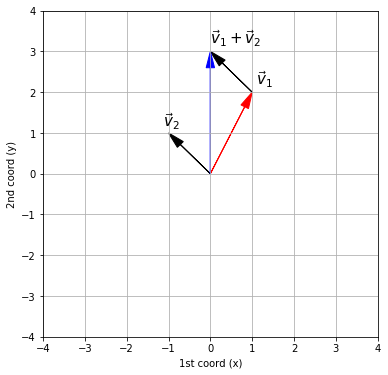

In [11]:
# A visualization of the sum of two 2D vectors.
v1=np.array([1,2])
v2=np.array([-1,1])
print 'v1=',v1,'v2=',v2
print "the red arrow is v1, the black arrow is v2, the blue arrow is v1+v2"
plot_arrows([[zero,v1,'r','$\\vec{v}_1$'],[zero,v2,'k','$\\vec{v}_2$'],[v1,v2,'k'],[zero,v1+v2,'b','$\\vec{v}_1+\\vec{v}_2$']],fontsize=15);

In [12]:
#Two vectors can be summed only if they have the same dimension:
try:
    np.array([1,1])+np.array([1,1,1])
except:
    print 'the two vectors have different dimensions'

the two vectors have different dimensions


v= [1 2] c= -0.5
the red arrow is v, the black arrow is -0.50*v


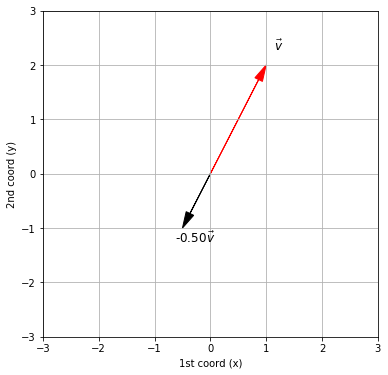

In [13]:
v=np.array([1,2])
c=-.5
print 'v=',v1,'c=',c
print "the red arrow is v, the black arrow is %4.2f*v"%c
plot_arrows([[zero,v1,'r','$\\vec{v}$'],[zero,c*v1,'k',"%4.2f$\\vec{v}$"%c]],text_loc=0.3,scale=3);

### The inner product
The **inner product** or **dot product** is an operation that takes as input two vectors of the same dimension, and outputs a number (a scalar). The mathematical notation for the dot product of the vectors $\vec{a}$ and $\vec{b}$ is $\vec{a} \cdot \vec{b}$

In [14]:
print "three ways to calculate the dot product of ",v1,v2,'all give the same result:'
print np.dot(v1,v2),
print v1[0]*v2[0] + v1[1]*v2[1],
print sum([v1[i]*v2[i] for i in range(len(v1))]) 

three ways to calculate the dot product of  [1 2] [-1  1] all give the same result:
1 1 1


### The norm of a vector
The **length**, **magnitude** or **norm** of a vector is the distance between the origin, where the vectors starts, and it's tip. Calculated as:
$$\| \vec{v} \| = \sqrt{\sum_i v_i^2} = \sqrt{\vec{v}\cdot\vec{v}}$$

<img style="width:300px" src="images/vector.png">

In [15]:
from numpy.linalg import norm
from math import sqrt
print "two ways of calculating the norm of the vector",v1
print sqrt(np.dot(v1,v1)),
print norm(v1)

two ways of calculating the norm of the vector [1 2]
2.2360679775 2.2360679775


### Unit vectors
Of particular importance are vectors whose norm is **1**, such vectors are called *unit vectors*

In [16]:
print """Any vector can be *normalized* to have unit length 
by dividing the vector by its norm.
below we set `u1` to be the normalized version of `v1`
"""

print 'v1=',v1,'norm(v1)=',norm(v)
print 'u1 is a normalized version of v1: u1=v1/norm(v1)'
u1=v1/norm(v1)
print 'u1=',u1,'norm(u1)=',norm(u1)

Any vector can be *normalized* to have unit length 
by dividing the vector by its norm.
below we set `u1` to be the normalized version of `v1`

v1= [1 2] norm(v1)= 2.2360679775
u1 is a normalized version of v1: u1=v1/norm(v1)
u1= [ 0.4472136   0.89442719] norm(u1)= 1.0


### Projections
Taking the dot product of an arbitrary vector `v2` with a unit vector `u1` has a simple geometric interpretation

In [17]:
p=u1*np.dot(u1,v2)
print p

[ 0.2  0.4]


The red arrow is the unit vector u1, the black arrow is v2
The blue line indicates the projection of v2 on the direction u1
The green arrow is the result of this projection
The NORM of the green arrow is equal to the dot product dot(u1,v2)


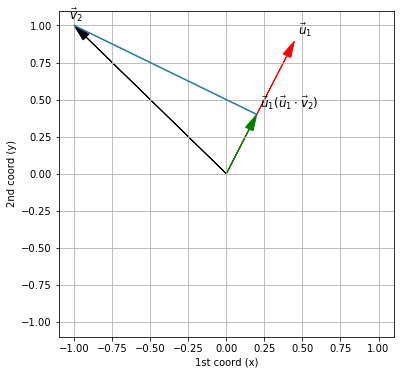

In [18]:
print """The red arrow is the unit vector u1, the black arrow is v2
The blue line indicates the projection of v2 on the direction u1
The green arrow is the result of this projection
The NORM of the green arrow is equal to the dot product dot(u1,v2)"""
ax=plot_arrows([[zero,u1,'r','$\\vec{u}_1$'],[zero,v2,'k','$\\vec{v}_2$'],\
                [zero,p,'g',"$\\vec{u}_1(\\vec{u}_1\\cdot \\vec{v}_2)$"]],\
               scale=1.1,text_loc=0.05)
ax.plot([v2[0],p[0]],[v2[1],p[1]]);

### Orthogonal vectors
Two vectors are orthogonal if their dot product is zero.

Equivalently, two vectors are orthogonal if the angle between them is 90 degrees.

black vector= [2 2] red_vector= [-1  1]
np.dot(a,b)= 0


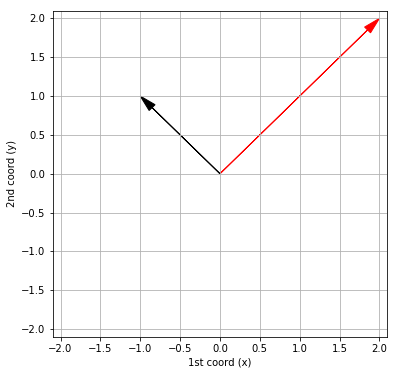

In [19]:
a=np.array([2,2])
b=np.array([-1,1])
print 'black vector=',a,'red_vector=',b
print 'np.dot(a,b)=',np.dot(a,b)
plot_arrows([[zero,a,'r'],[zero,b,'k']],scale=2.1);

## Orthonormal basis
We say that the vectors $\vec{u}_1,\vec{u}_2,\ldots,\vec{u}_d \in R^d$ form an **orthonormal basis** of $R^d$. If:

**Normality:** $\vec{u}_1,\vec{u}_2,\ldots,\vec{u}_d$ are unit vectors:  
$\forall 1 \leq i \leq d: \vec{u}_i \cdot \vec{u}_i =1 $

**Orthogonality:** Every pair of vectors are orthogonal:  
$\forall 1 \leq i\neq j \leq d: \vec{u}_i \cdot \vec{u}_j =0 $

### The Standard basis
The standard basis is: $\vec{e}_1 = [1,0,0,\ldots,0], \vec{e}_2 = [0,1,0,\ldots,0],$   

$\ldots,\vec{e}_d = [0,0,0,\ldots,1]$

The dot product of a vector $\vec{v}$  
with a standard basis vector $\vec{e}_i$  
is equal to the $i$th coordinate of $\vec{v}$,  
which we denote by $v_i$

In [20]:
v=np.array([5,6,3,4])
e2=np.array([0,1,0,0])
np.dot(v,e2)

6

### Reconstruction using an orthonormal basis
Orthonormal basis define a *coordinate system* and allow us to move between coordinate systems.

An orthonormal basis $\vec{u}_1,\ldots,\vec{u}_d$ can be used to represent any vector $\vec{v}$ in the following way. 

$\vec{v}$ is **represented** as a list of $d$ dot products: $$[\vec{v}\cdot\vec{u_1},\vec{v}\cdot\vec{u_2},\ldots,\vec{v}\cdot\vec{u_d}]$$

$\vec{v}$ is **reconstructed** by summing its projections on the basis vectors:
$$\vec{v} = (\vec{v}\cdot\vec{u_1})\vec{u_1} + \cdots + (\vec{v}\cdot\vec{u_d})\vec{u_d}$$

* Representing a vector $\vec{v}$ using the **standard** basis is yields the representation $[v_1,v_2,\ldots,v_d]$

* Representing $\vec{v}$ using an orthonormal basis is called a **change of basis**

### Visualizing change of basis
It is instructive to visualize a change of basis in $R^2$

We are changing the basis representing the vector v
from the standard basis (e1,e2) to a new orthonormal basis (u1,u2)
The green arrows are the projections of v onto the directions defined by u1 and u2


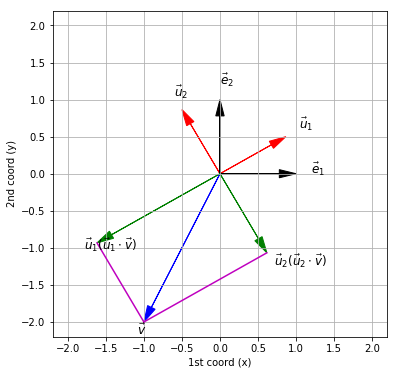

In [21]:
from math import sin,cos
v=np.array([-1,-2])
e1=np.array([1,0])
e2=np.array([0,1])
angle=np.pi/6.0 # 30 degrees
u1=np.array([cos(angle),sin(angle)])
u2=np.array([-sin(angle),cos(angle)])
v,e1,e2,u1,u2
p1=u1*np.dot(u1,v)
p2=u2*np.dot(u2,v)
ax=plot_arrows([[zero,u1,'r','$\\vec{u}_1$'],[zero,u2,'r','$\\vec{u}_2$'],
               [zero,e1,'k','$\\vec{e}_1$'],[zero,e2,'k','$\\vec{e}_2$'],\
               [zero,v,'b','$\\vec{v}$'],\
               [zero,p1,'g',"$\\vec{u}_1(\\vec{u}_1\\cdot \\vec{v})$"],\
               [zero,p2,'g',"$\\vec{u}_2(\\vec{u}_2\\cdot \\vec{v})$"]],\
               scale=2.2,text_loc=0.2)
ax.plot([v[0],p1[0]],[v[1],p1[1]],'m');
ax.plot([v[0],p2[0]],[v[1],p2[1]],'m');
print """We are changing the basis representing the vector v
from the standard basis (e1,e2) to a new orthonormal basis (u1,u2)
The green arrows are the projections of v onto the directions defined by u1 and u2"""

## Next video: Matrix notation.

## Excercises

### Excercise 1

Let $\vec{v} \in R^2$ be a vector created using numpy. Your task is to write two functions, **project_e1** and **project_e2**. The functions should take $\vec{v}$ as an input and should then output the projection of $\vec{v}$ onto the corresponding vector in the standard basis.

 
<font  style="color:blue"> * **Code:** *</font>
```python
v = np.array([-2,4])
print v
print project_e1(v)
print project_e2(v)
print type( project_e2(v) )
```


<font  style="color:magenta"> * **Output:** *</font>
```
[-2  4]
[-2  0]
[0 4]
<type 'numpy.ndarray'>
```

In [22]:
# modify this cell

def project_e1(v):
    # input: v is a 2D numpy.array 
    # output: return the projection of v onto [1,0]
    
    ### BEGIN SOLUTION
    return np.array([1,0])*np.dot(v,[1,0])
    ### END SOLUTION

In [23]:
# modify this cell

def project_e2(v):
    # input: v is a 2D numpy.array 
    # output: return the projection of v onto [0,1]
    
    ### BEGIN SOLUTION
    return np.array([0,1])*np.dot(v,[0,1])
    ### END SOLUTION

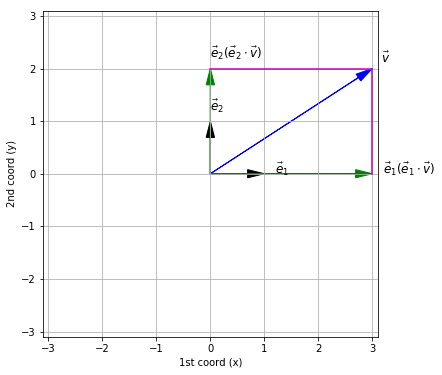

In [24]:
v = np.array([3,2])
assert type(project_e1(v)) == type(np.array([3,0]))
assert sum(abs( project_e1(v) - np.array([3,0]) )) < 10**-6
assert sum(abs( project_e2(v) - np.array([0,2]) )) < 10**-6

e1=np.array([1,0])
e2=np.array([0,1])
p1= project_e1(v)
p2= project_e2(v)
ax=plot_arrows([[zero,e1,'k','$\\vec{e}_1$'],[zero,e2,'k','$\\vec{e}_2$'],\
               [zero,v,'b','$\\vec{v}$'],\
               [zero,p1,'g',"$\\vec{e}_1(\\vec{e}_1\\cdot \\vec{v})$"],\
               [zero,p2,'g',"$\\vec{e}_2(\\vec{e}_2\\cdot \\vec{v})$"]],\
               scale=3.1,text_loc=0.2)
ax.plot([v[0],p1[0]],[v[1],p1[1]],'m');
ax.plot([v[0],p2[0]],[v[1],p2[1]],'m');

### BEGIN HIDDEN TESTS
v = np.array([5,-2])
assert sum(abs( project_e1(v) - np.array([5,0]) )) < 10**-6
assert sum(abs( project_e2(v) - np.array([0,-2]) )) < 10**-6
### END HIDDEN TESTS

### Excercise 2

Below we see that 
$\vec{u_1}=\pmatrix{\frac{1}{\sqrt{2}}\  ,\frac{1}{\sqrt{2}}}$ 
and 
$\vec{u_2}=\pmatrix{\frac{1}{\sqrt{2}}\  ,\frac{-1}{\sqrt{2}}}$ 
also form an orthonormal basis in $R^2$.

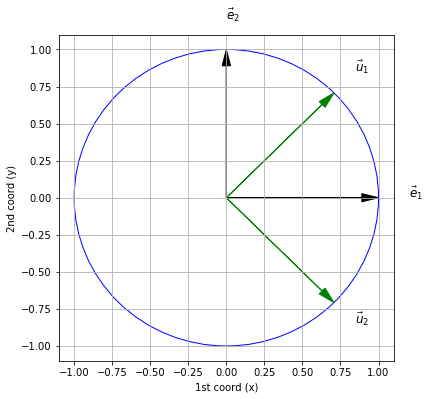

In [25]:
e1=np.array([1,0])
e2=np.array([0,1])
u1=np.array([1,1])/2**.5
u2=np.array([1,-1])/2**.5
ax=plot_arrows([[zero,e1,'k','$\\vec{e}_1$'],[zero,e2,'k','$\\vec{e}_2$'],\
                [zero,u1,'g','$\\vec{u}_1$'],[zero,u2,'g','$\\vec{u}_2$']],\
               scale=1.1,text_loc=0.2)
circ=plt.Circle((0, 0), radius=1, edgecolor='b', facecolor='None')
ax.add_patch(circ)

Using
$\vec{u_1}=\pmatrix{\frac{1}{\sqrt{2}}\  ,\frac{1}{\sqrt{2}}}$ 
and 
$\vec{u_2}=\pmatrix{\frac{1}{\sqrt{2}}\  ,\frac{-1}{\sqrt{2}}}$ 
your task is to write two functions, **project_u1** and **project_u2**. The functions should take $\vec{v}$ as an input and should then output the projection of $\vec{v}$ onto the corresponding vector.

<font  style="color:blue"> * **Code:** *</font>
```python
v = np.array([2,1])
print v
print project_u1(v)
print project_u2(v)
print type( project_u2(v) )
```


<font  style="color:magenta"> * **Output:** *</font>
```
[2 1]
[ 1.5  1.5]
[ 0.5 -0.5]
<type 'numpy.ndarray'>
```

In [26]:
# modify this cell

def project_u1(v):
    # input: v is a 2D numpy.array 
    # output: return the projection of v onto [1/sqrt(2),1/sqrt(2)]
    
    ### BEGIN SOLUTION
    u1 = np.array([1,1])/2**.5
    return u1 * np.dot(v,u1)
    ### END SOLUTION

In [27]:
# modify this cell

def project_u2(v):
    # input: v is a 2D numpy.array 
    # output: return the projection of v onto [1/sqrt(2),-1/sqrt(2)]
    
    ### BEGIN SOLUTION
    u2 = np.array([1,-1])/2**.5
    return u2 * np.dot(v,u2)
    ### END SOLUTION

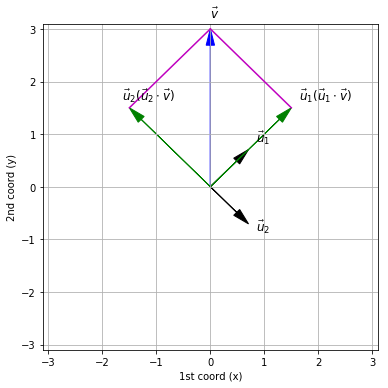

In [28]:
v = np.array([0,3])
assert type(project_u1(v)) == type(np.array([1.5,1.5]))
assert sum(abs( project_u1(v) - np.array([1.5,1.5]) )) < 10**-6
assert sum(abs( project_u2(v) - np.array([-1.5,1.5]) )) < 10**-6

u1=np.array([1,1])/2**.5
u2=np.array([1,-1])/2**.5
p1= project_u1(v)
p2= project_u2(v)
ax=plot_arrows([[zero,u1,'k','$\\vec{u}_1$'],[zero,u2,'k','$\\vec{u}_2$'],\
               [zero,v,'b','$\\vec{v}$'],\
               [zero,p1,'g',"$\\vec{u}_1(\\vec{u}_1\\cdot \\vec{v})$"],\
               [zero,p2,'g',"$\\vec{u}_2(\\vec{u}_2\\cdot \\vec{v})$"]],\
               scale=3.1,text_loc=0.2)
ax.plot([v[0],p1[0]],[v[1],p1[1]],'m');
ax.plot([v[0],p2[0]],[v[1],p2[1]],'m');

### BEGIN HIDDEN TESTS
v = np.array([-2,1])
assert sum(abs( project_u1(v) - np.array([-0.5, -0.5]) )) < 10**-6
assert sum(abs( project_u2(v) - np.array([-1.5,  1.5]) )) < 10**-6
### END HIDDEN TESTS